# Regression with Gradient Boosting on Titanic Data

### 1. Predicting Age

##### 1.1 Import the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12356)
df = pd.read_csv('titanic.csv')
df = df.dropna()

##### 1.2 Assign input and output variabble

In [2]:
# Assign input variables
X = df.loc[:,['Pclass','Sex','Fare','Embarked','SibSp','Parch','Survived']]

# Assign target variable
y = df['Age']

##### 1.3 Handle some missing and fix variables types

In [3]:
# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)
X['Survived'] = X['Survived'].astype(object)

##### 1.4 Encode categorical variable

In [4]:
X = pd.get_dummies(X)

##### 1.5 Split the data

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

##### 1.6 Set up and Train Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
r1 = GradientBoostingRegressor(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))

Rsquared on Testing:  -0.5469087105560149


### Variable Importance

<AxesSubplot:ylabel='Variables'>

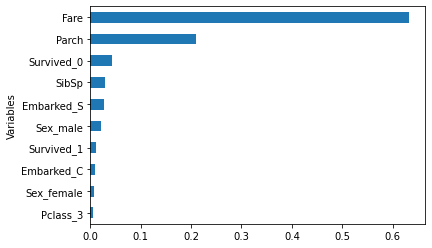

In [7]:
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

Text(0.5, 1.1, 'Learning fast vs. Learning slow')

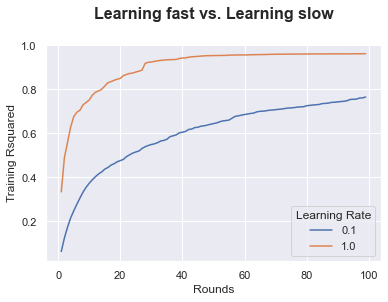

In [8]:
# Plot the Training Accuracy of gradient boosting with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Training Rsquared']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingRegressor(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_train,y_train) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Rsquared'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Rsquared", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Learning fast vs. Learning slow')

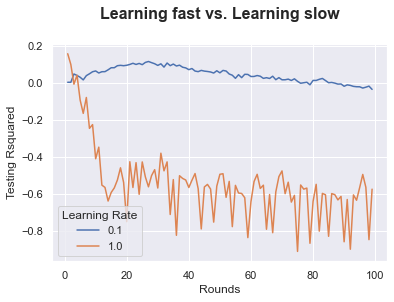

In [9]:
# Plot the Training Accuracy of gradient boosting with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Testing Rsquared']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingRegressor(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_test,y_test) ]], 
                                    columns=list(['Rounds','Learning Rate','Testing Rsquared'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Testing Rsquared", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### 2. Practice

Predicting NBA Salary. Download the data at: https://bryantstats.github.io/math460/python/nba_salary.csv

1. Import the data and drop all the missing values

2. Set the input (X) and output (y) (Use `df.columns` to see all the columns to easier copy/paste). Split the data into 60% training and 40% testing (No need to do 1.3 and 1.4 as all variables are numeric and have correct types)

2. Train an gradient boosting with `200 n_estimators` and .1 `learning_rare`. What is testing Rsquared of the gradient boosting?

3. What is the most important variable according to the above gradient boosting model?

4. Find an gradient boosting (try a few different of `n_estimators` and `learning_rate`) that have a higher testing Rsquared than the above gradient boosting. What is the n_estimators and learning of this gradient boosting? 